In [1]:
import swarms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

try:
    plt.style.use('paper')
except:
    pass

In [2]:
Mmoon = 7.35e22 # kg
Mearth = 5.97e24 # kg
Mjup = 318*Mearth # kg
AU = 1.496e11 # m
Rjup = 6.99e7 # m
pc = 3.086e16 # m
Lsun = 3.828e26 # W
Msun = 1.989e30 # kg
Jansky = 1.e-26 # SI

star = swarms.Star(L=20*Lsun, M=2.1*Msun, T=8410, d=10*pc)
planet = swarms.Planet(star, M=Mjup, R=Rjup, a=50*AU, Q=0.5)
    
# Swarm
RHO=1500
M0 = 10 * Mmoon; Dt = 100.; Dmax = 250000.;
M_pl = 318 * Mearth; a_pl = 50 * AU; R_pl = Rjup
eta = 0.4; Nstr = 6.; Q = 0.1
swarm = swarms.CollSwarm(star, planet, M0, Dt, Dmax, eta, Nstr, Q, correction=True, alpha=1./1.2)

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


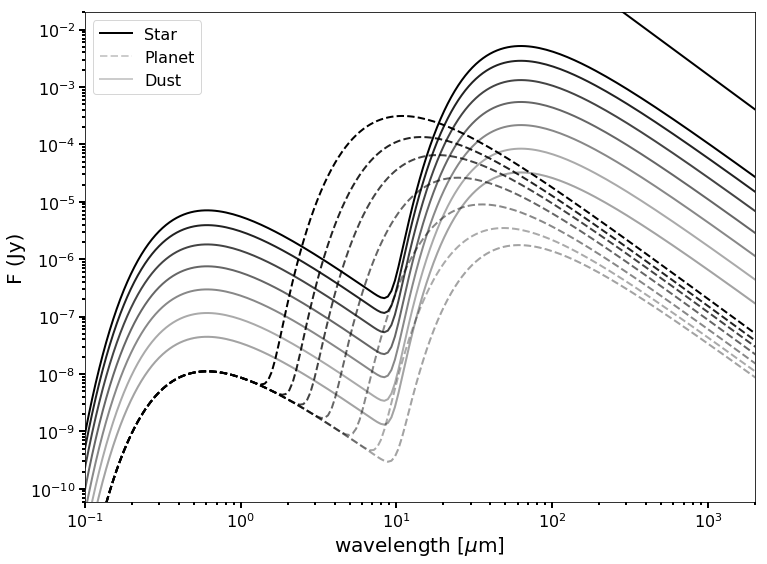

In [3]:
lambdas = np.logspace(-7, -2.5, 200)
times = np.logspace(7.5, 10, 7)
alphas = np.linspace(1, 0.2, 7)
g = 0.32 # assume phase function for Lambert sphere at maximum extension from host star

Fstar = star.F(lambdas, star.d)

fig, ax = plt.subplots(figsize=(12,9))
ax.loglog(lambdas*1e6, Fstar/Jansky, 'k', lw=2, label="Star")

for time, alpha in zip(times, alphas):
    planet.age = time
    swarm.updateSwarm(time)
    Fplanet = planet.Fthermal(lambdas) + planet.Fscat(lambdas, g)
    FISD = swarm.Fthermal(lambdas) + swarm.Fscat(lambdas, g)

    ax.loglog(lambdas*1e6, Fplanet/Jansky, 'k--', lw=2, alpha=alpha)
    ax.loglog(lambdas*1e6, FISD/Jansky, 'k', lw=2, alpha=alpha)
 
# overplot last lines with labels
ax.loglog(lambdas*1e6, Fplanet/Jansky, 'k--', lw=2, label="Planet", alpha=alpha)
ax.loglog(lambdas*1e6, FISD/Jansky, 'k', lw=2, label="Dust", alpha=alpha)

ax.set_xlabel(r"wavelength [$\mu$m]")
ax.set_ylabel("F (Jy)")
ax.set_ylim([6e-11, 2.e-2])
ax.set_xlim([0.1, 2000])
ax.legend()